### 1. درآمد خانوارهای شهری و روستایی استان چهارمحال و. بختیاری

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_total_job_income(df, address):
    return df[df['Address'] == address]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, address):
    return df[df['Address'] == address]['income_s_y'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_subsidy_income(df, address):
    return df[df['Address'] == address]['subsidy'].apply(to_int).sum()


def get_total_income(df, address):
    return df[df['Address'] == address]['income'].apply(to_int).sum()


def calc_total_family_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Address']), axis=1)
    df_job_income.drop_duplicates(subset=['Address'], inplace=True)
    df_job_income = df_job_income[['Address', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Address']), axis=1)
    df_free_income.drop_duplicates(subset=['Address'], inplace=True)
    df_free_income = df_free_income[['Address', 'income']]

    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Address'], inplace=True)
    df_other_income = df_other_income[['Address', 'income']]

    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Address']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Address'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Address', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    df_income['income'] = df_income.apply(lambda r: get_total_income(df_income, r['Address']), axis=1)
    df_income.drop_duplicates(subset=['Address'], inplace=True)

    df_Data = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'Data')

    df_Data = df_Data[df_Data['province'] == 'CharmahalBakhtiari']
    df_Data = df_Data.merge(df_income, on='Address')

    return df_Data


In [3]:
R98_income = calc_total_family_income('R98.xlsx')
R98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21401545208,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,162420000
1,21401545211,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,306190000
2,21401545214,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,15.0,CharmahalBakhtiari,1,126920000
3,21401545217,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,28120000
4,21401545220,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,21.0,CharmahalBakhtiari,1,39000000


In [4]:
R99_income = calc_total_family_income('R99.xlsx')
R99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545215,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,125570000
1,21401545217,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,36110000
2,21401545221,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,56990000
3,21401545223,6,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,147290000
4,21401545226,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,218310000


In [5]:
R1400_income = calc_total_family_income('R1400.xlsx')
R1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545221,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,118760000
1,21401545223,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,217920000
2,21401545225,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,624400000
3,21401545226,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,650805000
4,21401545232,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,402250000


In [6]:
R1401_income = calc_total_family_income('R1401.xlsx')
R1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21402545926,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,667080000
1,21402545929,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,492080000
2,21402545932,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,981600000
3,21402545935,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,706400000
4,21402545938,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,423740000


In [7]:
U98_income = calc_total_family_income('U98.xlsx')
U98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171708,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,303760000
1,11401171711,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,594960018
2,11401171714,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,294995009
3,11401171717,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,185460000
4,11401171720,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,296380000


In [8]:
U99_income = calc_total_family_income('U99.xlsx')
U99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171714,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,421390000
1,11401171717,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,251130000
2,11401171720,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,CharmahalBakhtiari,1,388380000
3,11401171726,11,4,328.919621,1,2,NaN,2.0,NaN,1.0,NaN,NaN,NaN,55.0,27.0,1.0,2.0,CharmahalBakhtiari,1,58380000
4,11401171729,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,722730000


In [9]:
U1400_income = calc_total_family_income('U1400.xlsx')
U1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171720,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,1023180000
1,11401171723,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,683740000
2,11401171727,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,64360000
3,11401171729,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,922640000
4,11401171732,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,217860000


In [10]:
U1401_income = calc_total_family_income('U1401.xlsx')
U1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171826,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,1799010000
1,11401171829,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,455780000
2,11401171832,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,105080000
3,11401171838,1,348.310329,1,2,,,3,1,,,15.0,39.0,CharmahalBakhtiari,1,402680000
4,11401171841,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,545445000


### مقایسه درآمد خانوارهای روستایی و شهری در سال 1398


In [11]:
R99_income['income'].mean(), U99_income['income'].mean()

(385434775.8343685, 490428508.240566)

In [12]:
R99_income['income'].std(), U99_income['income'].std()

(274244684.6791777, 325189937.6262645)

(array([242., 170.,  54.,  14.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([3.251000e+07, 3.353930e+08, 6.382760e+08, 9.411590e+08,
        1.244042e+09, 1.546925e+09, 1.849808e+09, 2.152691e+09,
        2.455574e+09, 2.758457e+09, 3.061340e+09]),
 <BarContainer object of 10 artists>)

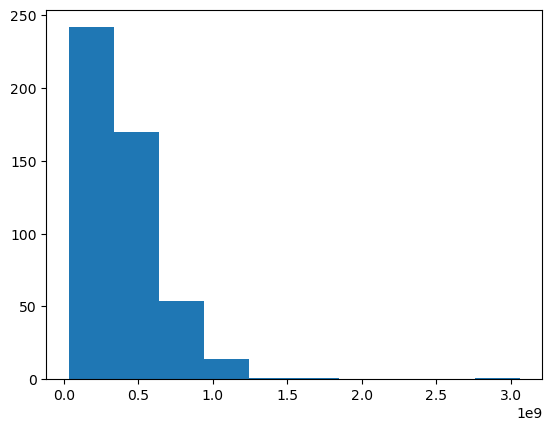

In [13]:
import matplotlib.pyplot as plt

plt.hist(R99_income['income'])

(array([  1.,  42., 255., 215.,  76.,  23.,  12.,   9.,   1.,   2.]),
 array([-4.3824000e+08, -1.5701790e+08,  1.2420420e+08,  4.0542630e+08,
         6.8664840e+08,  9.6787050e+08,  1.2490926e+09,  1.5303147e+09,
         1.8115368e+09,  2.0927589e+09,  2.3739810e+09]),
 <BarContainer object of 10 artists>)

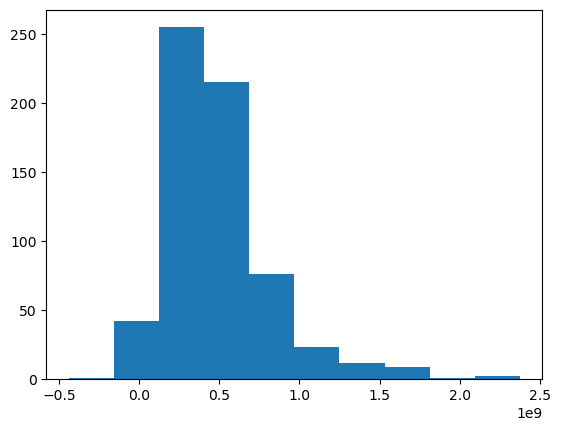

In [14]:
plt.hist(U99_income['income'])

In [15]:
R99_income = R99_income[R99_income['income'] >= 0]

(array([ 30.,  38.,  76., 167.,  93.,  58.,  19.,   0.,   1.,   1.]),
 array([ 422.16899921,  528.50289473,  634.83679024,  741.17068576,
         847.50458128,  953.83847679, 1060.17237231, 1166.50626782,
        1272.84016334, 1379.17405885, 1485.50795437]),
 <BarContainer object of 10 artists>)

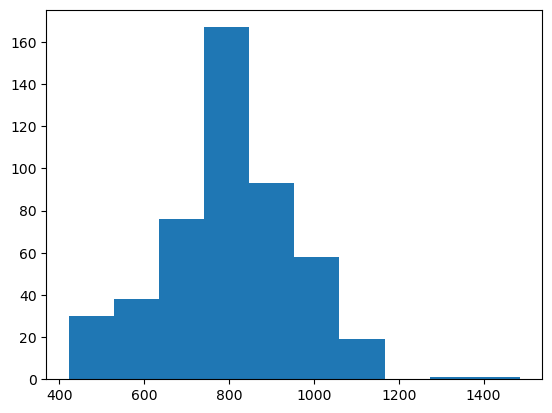

In [16]:
from scipy import stats

R99_income_normal, _ = stats.yeojohnson(R99_income['income'])
plt.hist(R99_income_normal, bins=10)

In [17]:
U99_income = U99_income[U99_income['income'] >= 0]

(array([ 10.,  20.,  47., 111., 205., 128.,  70.,  30.,  11.,   3.]),
 array([ 571.12678724,  768.38994356,  965.65309989, 1162.91625622,
        1360.17941254, 1557.44256887, 1754.7057252 , 1951.96888152,
        2149.23203785, 2346.49519418, 2543.7583505 ]),
 <BarContainer object of 10 artists>)

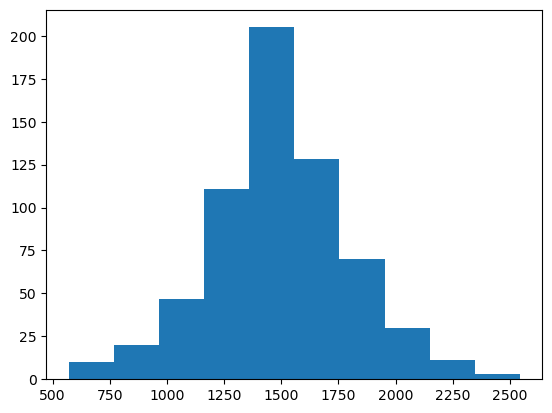

In [18]:
U99_income_normal, _ = stats.yeojohnson(U99_income['income'])
plt.hist(U99_income_normal, bins=10)

### سال 1398

In [27]:
n1 = len(U98_income['income'])
n2 = len(R98_income['income'])
x1 = U98_income['income'].mean()
x2 = R98_income['income'].mean()
s1 = U98_income['income'].std(ddof=1)
s2 = R98_income['income'].std(ddof=1)

degree_of_freedom = n1 + n2 - 2
t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

t_value, p_value

(7.179535283335833, 6.358247262028272e-13)

### سال 1399

In [28]:
n1 = len(U99_income['income'])
n2 = len(R99_income['income'])
x1 = U99_income['income'].mean()
x2 = R99_income['income'].mean()
s1 = U99_income['income'].std(ddof=1)
s2 = R99_income['income'].std(ddof=1)

degree_of_freedom = n1 + n2 - 2
t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

t_value, p_value

(5.947693799399348, 1.817120565128505e-09)

### سال 1400

In [29]:
n1 = len(U1400_income['income'])
n2 = len(R1400_income['income'])
x1 = U1400_income['income'].mean()
x2 = R1400_income['income'].mean()
s1 = U1400_income['income'].std(ddof=1)
s2 = R1400_income['income'].std(ddof=1)

degree_of_freedom = n1 + n2 - 2
t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

t_value, p_value

(6.390368435029331, 1.2034506724489802e-10)

### سال 1401

In [30]:
n1 = len(U1401_income['income'])
n2 = len(R1401_income['income'])
x1 = U1401_income['income'].mean()
x2 = R1401_income['income'].mean()
s1 = U1401_income['income'].std(ddof=1)
s2 = R1401_income['income'].std(ddof=1)

degree_of_freedom = n1 + n2 - 2
t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

t_value, p_value

(5.883693801271286, 2.6328919044971144e-09)

در این حالت چون مقدار پی از 0.05 کوچکتر است یعنی اگر فرض اولیه ما مبنی بر تساوی درآمد خانوارهای شهری و روستایی یکسان باشد، احتمال مشاهده چنین نمونه ای صفر است
بنابراین فرض اولیه باطل و نتیجه می شود که درآمد خانوارهای شهری و روستایی یکسان نمی باشد